In [7]:
import torch
torch.cuda.is_available()

True

In [1]:
from Data_train import epoch 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
import numpy as np

create_epoch = epoch.create_epoch

model = XGBRegressor(tree_method='gpu_hist', gpu_id=0)
# X, Y = create_epoch()




# with open("Data_train/Saved/arrayX.txt", "a") as arrayX:
#           np.savetxt(arrayX, X, delimiter=",", fmt='%.4f')

# with open("Data_train/Saved/arrayY.txt", "a") as arrayY:
#           np.savetxt(arrayY, Y, delimiter=",", fmt='%.4f')


/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
X = np.loadtxt("Data_train/Saved/arrayX.txt", delimiter=",")
Y = np.loadtxt("Data_train/Saved/arrayY.txt", delimiter=",")

In [3]:
X = X[:, 17:]

In [4]:
# split data into train and test sets
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(253562, 768)
(63391, 768)
(253562,)
(63391,)


In [9]:
model.fit(X_train, y_train)
print(model)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [10]:
# make predictions for test data
y_pred = model.predict(X_test)

In [11]:
np.sqrt(np.square(np.subtract(y_test, y_pred))).sum()/y_test.shape[0]

2.1083570850647506

In [12]:
y_pred_int = np.asarray(y_pred, dtype = np.int32)
y_pred_int[y_pred_int < 0] = 0

In [13]:

print('Số lượng lable > 0',len(y_test[y_test > 0]))
print('Số lượng lable == 0',len(y_test[y_test == 0]))

print('Số lượng pred > 0',len(y_pred_int[y_pred_int > 0]))
print('Số lượng pred == 0',len(y_pred_int[y_pred_int == 0]))
print('Số lượng pred == 0',len(y_pred_int[y_pred_int < 0]))

Số lượng lable > 0 27602
Số lượng lable == 0 35789
Số lượng pred > 0 60552
Số lượng pred == 0 2839
Số lượng pred == 0 0


In [14]:
total = len(y_test[y_test == 0])
acc = ((y_test == 0) & (y_pred_int == 0)).sum()
acc/total

0.04104613149291682

In [15]:
condition = np.where(y_test != 0)
np.sqrt(np.square(np.subtract(y_test[condition], y_pred[condition]))).sum()/y_test.shape[0]

1.1670823860869146

In [16]:
print(np.max(np.subtract(y_test[condition], y_pred[condition])))
print(np.min(np.subtract(y_test[condition], y_pred[condition])))

820.1955791711807
-4.790904521942139


<AxesSubplot:>

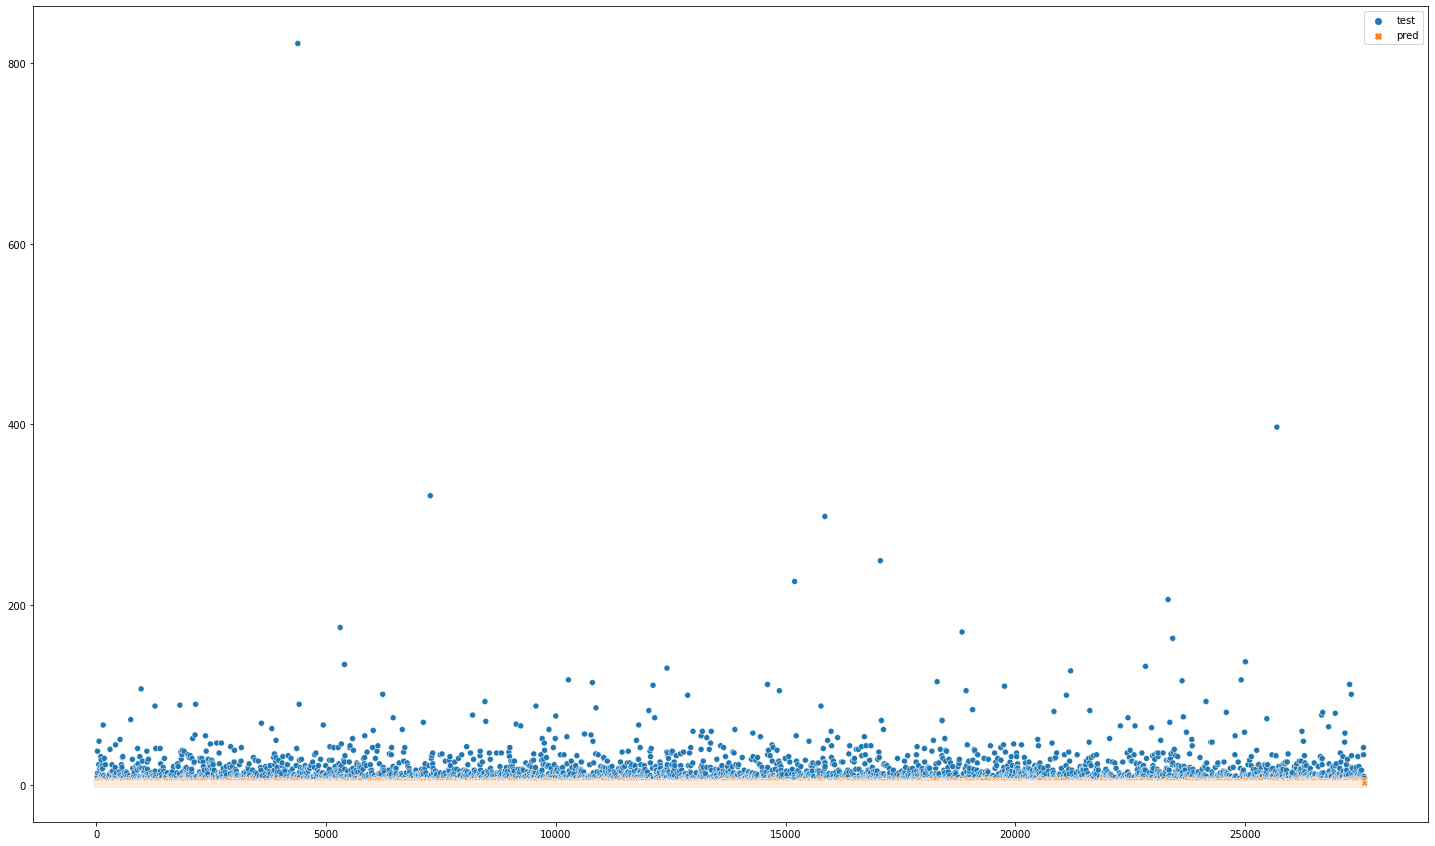

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
condition = np.where(y_test != 0)

df = pd.DataFrame({'test':  y_test[condition],
                    'pred': y_pred[condition]})

fig, ax = plt.subplots(figsize = (25, 15))
sns.scatterplot(data = df, ax = ax)

In [18]:
for test, pred in zip(y_test, y_pred):
          print('test:', test)
          print('pred:', np.round(pred))

test: 1.0
pred: 2.0
test: 4.0
pred: 1.0
test: 0.0
pred: 2.0
test: 0.0
pred: 1.0
test: 0.0
pred: 1.0
test: 1.0
pred: 1.0
test: 3.0
pred: 1.0
test: 3.0
pred: 1.0
test: 0.0
pred: 1.0
test: 1.0
pred: 1.0
test: 0.0
pred: 2.0
test: 0.0
pred: 1.0
test: 0.0
pred: 2.0
test: 2.0
pred: 1.0
test: 0.0
pred: 2.0
test: 0.0
pred: 2.0
test: 1.0
pred: 2.0
test: 2.0
pred: 2.0
test: 0.0
pred: 1.0
test: 0.0
pred: 2.0
test: 0.0
pred: 2.0
test: 0.0
pred: 2.0
test: 1.0
pred: 2.0
test: 0.0
pred: 2.0
test: 0.0
pred: 1.0
test: 0.0
pred: 1.0
test: 3.0
pred: 1.0
test: 5.0
pred: 1.0
test: 2.0
pred: 1.0
test: 0.0
pred: 1.0
test: 4.0
pred: 1.0
test: 0.0
pred: 2.0
test: 0.0
pred: 3.0
test: 0.0
pred: 2.0
test: 3.0
pred: 1.0
test: 1.0
pred: 2.0
test: 0.0
pred: 1.0
test: 1.0
pred: 2.0
test: 0.0
pred: 2.0
test: 0.0
pred: 1.0
test: 0.0
pred: 2.0
test: 0.0
pred: 1.0
test: 9.0
pred: 2.0
test: 2.0
pred: 2.0
test: 0.0
pred: 2.0
test: 0.0
pred: 2.0
test: 0.0
pred: 2.0
test: 1.0
pred: 2.0
test: 0.0
pred: 2.0
test: 1.0
pred: 1.0


In [40]:
temp = np.zeros(shape = X_test.shape)

temp[:, :17] = X_test[:, :17]
pred = model.predict(temp)
pred_int = np.asarray(pred, dtype = np.int32)

total = len(y_test[y_test == 0])
acc = ((y_test == 0) & (pred_int == 0)).sum()
acc/total

0.8507642012908995

In [41]:
condition = np.where(y_test != 0)
np.sqrt(np.square(np.subtract(y_test[condition], pred_int[condition]))).sum()/y_test.shape[0]

0.8798094366708208

<AxesSubplot:>

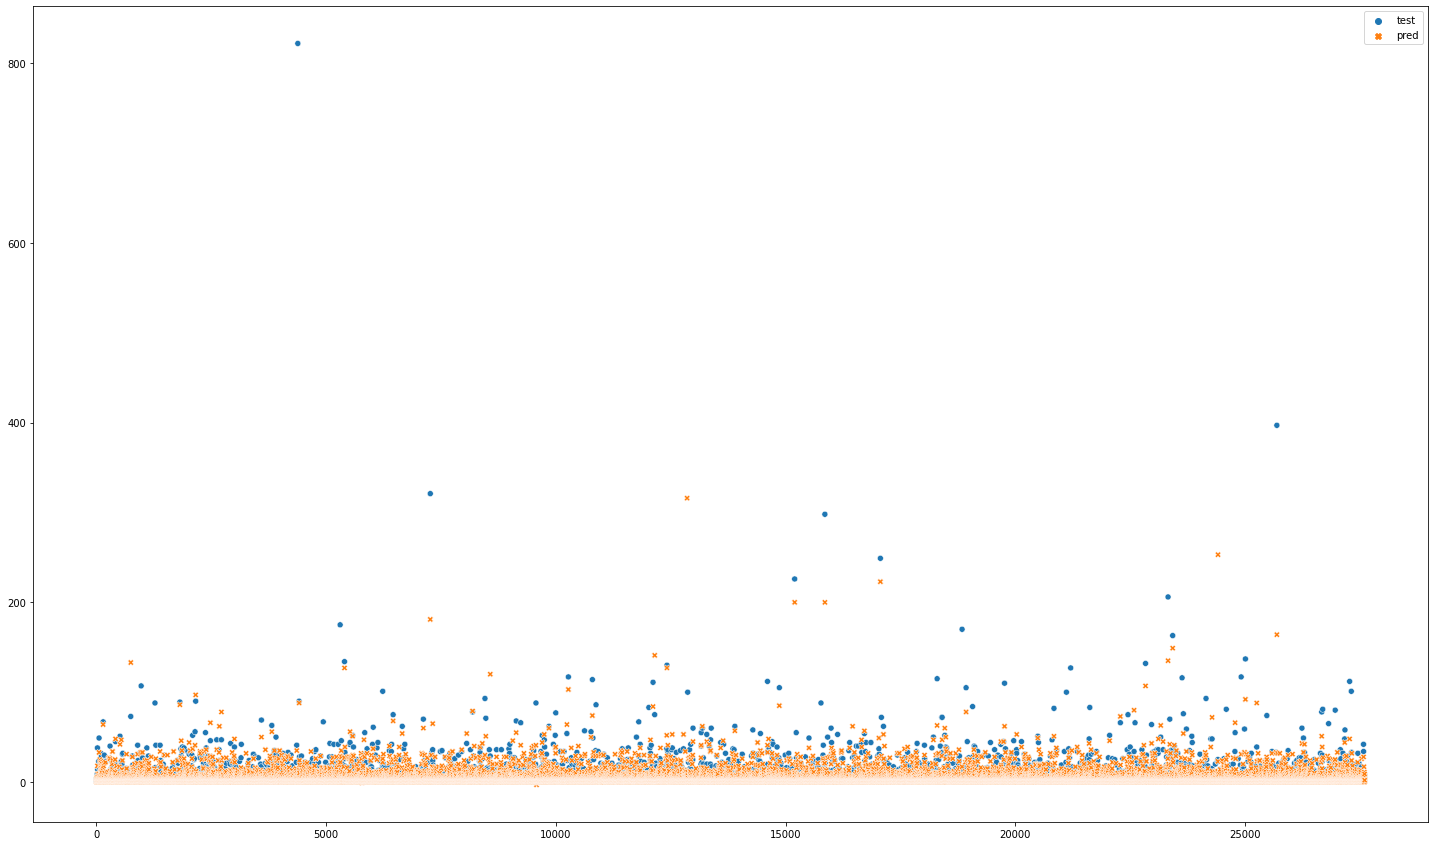

In [42]:
condition = np.where(y_test != 0)

df = pd.DataFrame({'test':  y_test[condition],
                    'pred': pred_int[condition]})

fig, ax = plt.subplots(figsize = (25, 15))
sns.scatterplot(data = df, ax = ax)

In [32]:
temp = np.zeros(shape = X_test.shape)

temp[:, 17:] = X_test[:, 17:]
pred = model.predict(temp)
pred_int = np.asarray(pred, dtype = np.int32)

total = len(y_test[y_test == 0])
acc = ((y_test == 0) & (pred_int == 0)).sum()
acc/total

0.9253960714185923

In [33]:
condition = np.where(y_test != 0)
np.sqrt(np.square(np.subtract(y_test[condition], pred_int[condition]))).sum()/y_test.shape[0]

1.6420627533877048

<AxesSubplot:>

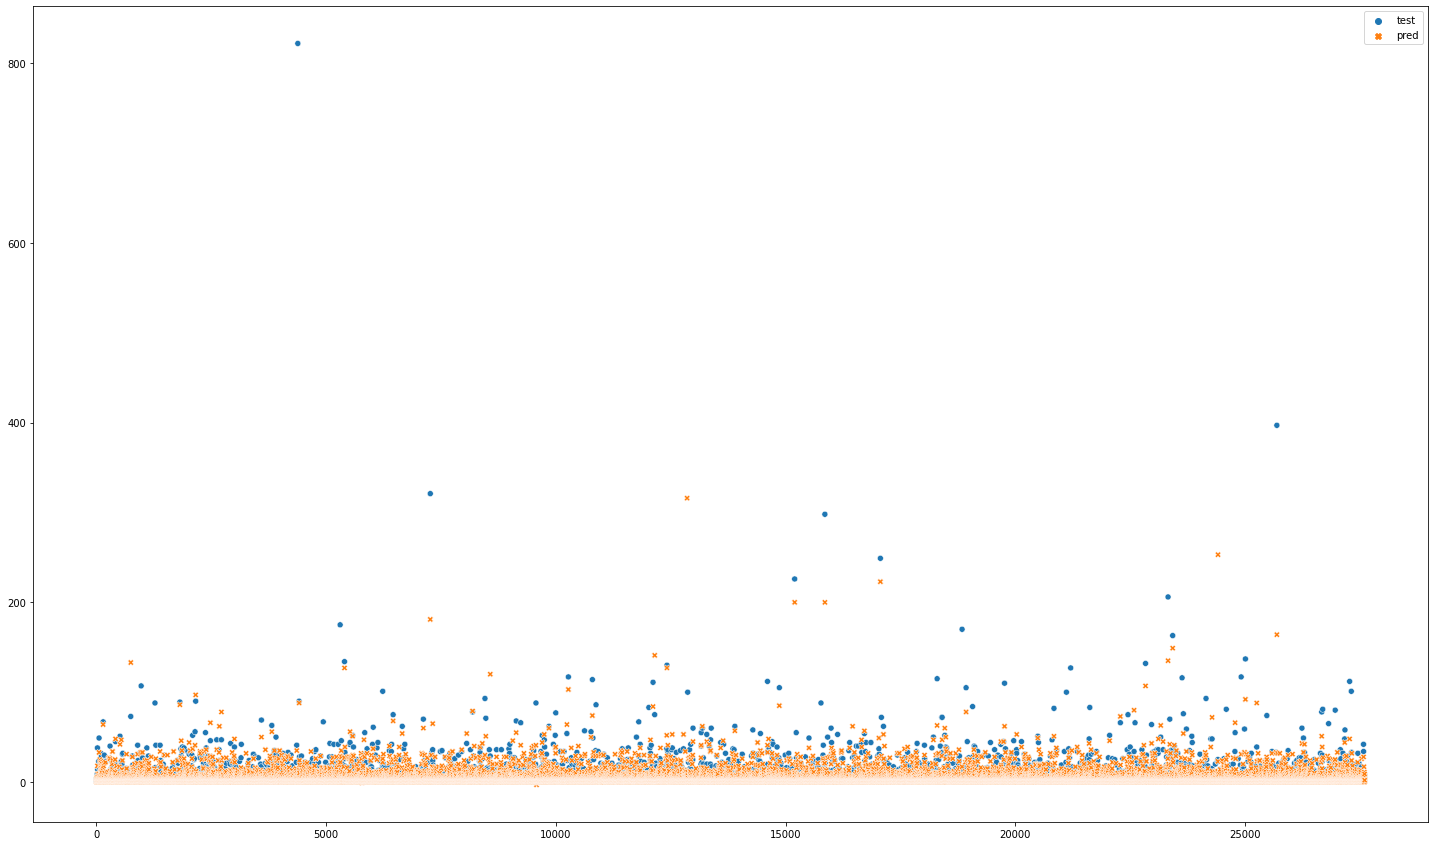

In [43]:
condition = np.where(y_test != 0)

df = pd.DataFrame({'test':  y_test[condition],
                    'pred': pred_int[condition]})

fig, ax = plt.subplots(figsize = (25, 15))
sns.scatterplot(data = df, ax = ax)

In [21]:
print('history của 15 ngày', X_test[0, : 15])
print('Ngày', X_test[0,15 : 16])
print('Tháng', X_test[0,16 : 17])
print(y_test[0])

temp = np.zeros(shape = (1, 785))
temp[0, :17] = [0,0,0,0,1,2,0,0,4,0,0,1,0,3,1,3,12]

pred = model.predict(temp)
pred

history của 15 ngày [0. 0. 0. 0. 1. 2. 0. 0. 4. 0. 0. 1. 0. 3. 1.]
Ngày [3.]
Tháng [12.]
1.0


array([0.83966523], dtype=float32)